In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [3]:
master_df = pd.read_csv("../scenario_master_list.csv")

Goal: create exact timing interventions for each archetype and scenario.

Columns: archetype, interval, day

## Southern:
school calendar:

- Term 1: mid-Jan to mid-April
- Term 2: mid-May to mid-Aug
- Term 3: ea Sept to ea Dec

Now in terms of day numbers:
useful link: https://cals.arizona.edu/azmet/julian.html
- Term 1: 15-105
- Term 2: 135-227
- Term 3: 244-335

Take "monthly" to be same day of each month:
- Term 1 - done on the 15th: 15, 46, 74, 105
- Term 2 - done on the 15th: 135, 166, 196, 227
- Term 3 - done on the 1st: 244, 274, 305, 335

In [9]:
southern_monthly = pd.DataFrame({
    "archetype": "Southern",
    "interval": "month",
    "day": [15,46,74,105,135,166,196,227,244,274,305,335]
})

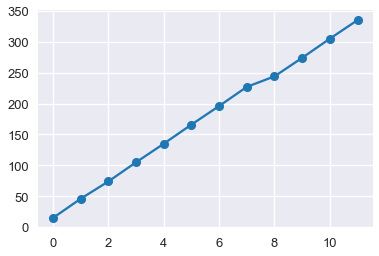

In [8]:
plt.plot(southern_monthly["day"], marker='o')

### Set up sweep values to check:

In [23]:
import itertools 

def create_df_from_combinations(input_dict):
    variable_names = []
    product_input_tuple = ()
    for key, value in input_dict.items():
        variable_names.append(key)
        product_input_tuple += (value,) # this is one way to add things to a tuple, apparently

    return pd.DataFrame(list(itertools.product(*product_input_tuple)), columns=variable_names)

In [24]:
delta_time = 10
t1_days = np.arange(15,105,delta_time)
t2_days = np.arange(135,227,delta_time)
t3_days = np.arange(244,335,delta_time)

if 105 not in t1_days:
    t1_days = np.append(t1_days, 105)
if 227 not in t2_days:
    t2_days = np.append(t2_days, 227)
if 335 not in t3_days:
    t3_days = np.append(t3_days, 335)
    
timing_sweep_df = create_df_from_combinations({
    "term1_day": t1_days,
    "term2_day": t2_days,
    "term3_day": t3_days
})

timing_sweep_df["scenario"] = range(len(timing_sweep_df))

In [26]:
timing_sweep_df.to_csv("southern_term_sweep_scenarios.csv", index=False)

## Create full intervention df

In [17]:
southern_by_term = pd.DataFrame({
    "archetype": "Southern",
    "interval": "term",
    "day": [15, 165, 254]
})

In [18]:
southern_by_day = pd.DataFrame({
    "archetype": "Southern",
    "interval": "day",
    "day": list(range(15,105+1)) + list(range(135,227+1)) + list(range(244,335+1))
})

In [19]:
southern_all = pd.concat([southern_monthly, southern_by_term, southern_by_day], ignore_index=True)

In [20]:
southern_all.to_csv("../ipt_schedule.csv", index=False)

# Sahel

school calendar:

- Term 1: mid-Sept to mid-Dec
- Term 2: ea-Jan to end-Mar
- Term 3: ea-Apr to end-May

Now in terms of day numbers:
useful link: https://cals.arizona.edu/azmet/julian.html
- Term 1: 258-349
- Term 2: 2-90
- Term 3: 98-151

Take "monthly" to be same day of each month:
- Term 1 - done on the 15th: 258, 288, 319, 349
- Term 2 - done on the ~1st: 2, 32, 60, 90, 
- Term 3 - done on the 15th: 105, 135

In [6]:
sahel_monthly = pd.DataFrame({
    "archetype": "Sahel",
    "interval": "month",
    "day": [2,32,60,90,105,135,258,288,319,349]
})

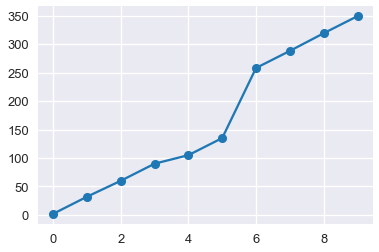

In [22]:
plt.plot(sahel_monthly["day"], marker='o')

In [24]:
delta_time = 10
t1_days = np.arange(258,349,delta_time)
t2_days = np.arange(2,90,delta_time)
t3_days = np.arange(95,151,delta_time)

if 349 not in t1_days:
    t1_days = np.append(t1_days, 349)
if 90 not in t2_days:
    t2_days = np.append(t2_days, 90)
if 151 not in t3_days:
    t3_days = np.append(t3_days, 151)
    
timing_sweep_df = create_df_from_combinations({
    "term1_day": t1_days,
    "term2_day": t2_days,
    "term3_day": t3_days
})

timing_sweep_df["scenario"] = range(len(timing_sweep_df))

In [25]:
timing_sweep_df.to_csv("sahel_term_sweep_scenarios.csv", index=False)

### Add Sahel to full intervention df

In [7]:
# best_timing = df[np.logical_and.reduce([
#     df["term1_day"]==278, # October 5
#     df["term2_day"]==2, # Jan 2
#     df["term3_day"]==151])] # May 31

sahel_by_term = pd.DataFrame({
    "archetype": "Sahel",
    "interval": "term",
    "day": [2, 151, 278]
})

sahel_by_day = pd.DataFrame({
    "archetype": "Sahel",
    "interval": "day",
    "day": list(range(2,90+1)) + list(range(95,151+1)) + list(range(258,349+1))
})

sahel_all = pd.concat([sahel_monthly, sahel_by_term, sahel_by_day], ignore_index=True)

In [9]:
df_all = pd.read_csv("../ipt_schedule.csv")

In [10]:
df_all = pd.concat([df_all, sahel_all], ignore_index=True)

In [12]:
df_all.to_csv("../ipt_schedule.csv", index=False)